In [1]:
 # Write a Python program to perform a Z-test for comparing a sample mean to a known population mean and interpret the results?

import scipy.stats as stats
import math

# Sample data
sample_mean = 105
population_mean = 100
population_std_dev = 15
sample_size = 50
significance_level = 0.05  # 5%

# Calculate Z-score
z_score = (sample_mean - population_mean) / (population_std_dev / math.sqrt(sample_size))

# Calculate p-value for two-tailed test
p_value = 2 * (1 - stats.norm.cdf(abs(z_score)))

# Print results
print(f"Z-score: {z_score:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpret results
if p_value < significance_level:
    print("Reject the null hypothesis: There is significant evidence that the sample mean differs from the population mean.")
else:
    print("Fail to reject the null hypothesis: There is not enough evidence to say the sample mean differs from the population mean.")

Z-score: 2.3570
P-value: 0.0184
Reject the null hypothesis: There is significant evidence that the sample mean differs from the population mean.


In [ ]:
# Simulate random data to perform hypothesis testing and calculate the corresponding P-value using Python.

import numpy as np
import scipy.stats as stats
import math

# Parameters for simulation
population_mean = 50
population_std_dev = 10
sample_size = 40
significance_level = 0.05

# Simulate a random sample from a normal distribution
np.random.seed(42)  # for reproducibility
sample_data = np.random.normal(loc=52, scale=population_std_dev, size=sample_size)  # sample mean shifted to 52

# Calculate sample mean
sample_mean = np.mean(sample_data)

# Calculate Z-score for the sample mean
z_score = (sample_mean - population_mean) / (population_std_dev / math.sqrt(sample_size))

# Calculate two-tailed p-value
p_value = 2 * (1 - stats.norm.cdf(abs(z_score)))

# Output results
print(f"Sample mean: {sample_mean:.4f}")
print(f"Z-score: {z_score:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpretation
if p_value < significance_level:
    print("Reject the null hypothesis: The sample mean significantly differs from the population mean.")
else:
    print("Fail to reject the null hypothesis: No significant difference between sample mean and population mean.")

In [ ]:
#  Implement a one-sample Z-test using Python to compare the sample mean with the population mean.

import numpy as np
import scipy.stats as stats
import math

# Sample data (you can replace these with your data)
sample_data = np.array([102, 98, 100, 105, 110, 95, 99, 101, 104, 97])
population_mean = 100
population_std_dev = 10  # Known population standard deviation
significance_level = 0.05

# Calculate sample statistics
sample_mean = np.mean(sample_data)
sample_size = len(sample_data)

# Calculate Z-score
z_score = (sample_mean - population_mean) / (population_std_dev / math.sqrt(sample_size))

# Calculate two-tailed p-value
p_value = 2 * (1 - stats.norm.cdf(abs(z_score)))

# Print results
print(f"Sample mean: {sample_mean:.4f}")
print(f"Z-score: {z_score:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpret the results
if p_value < significance_level:
    print("Reject the null hypothesis: Sample mean is significantly different from population mean.")
else:
    print("Fail to reject the null hypothesis: No significant difference between sample mean and population mean.")

Sample mean: 101.1000
Z-score: 0.3479
P-value: 0.7280
Critical Z-values: ±1.9600
Fail to reject the null hypothesis: No significant difference.


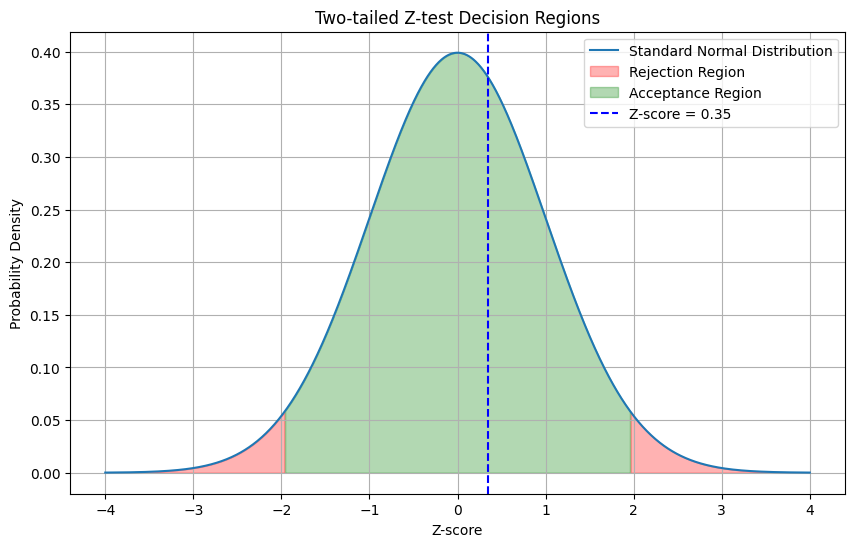

In [2]:
#  Perform a two-tailed Z-test using Python and visualize the decision region on a plot.

import numpy as np
import scipy.stats as stats
import math
import matplotlib.pyplot as plt

# Sample data and known population parameters
sample_data = np.array([102, 98, 100, 105, 110, 95, 99, 101, 104, 97])
population_mean = 100
population_std_dev = 10
sample_size = len(sample_data)
significance_level = 0.05

# Calculate sample mean
sample_mean = np.mean(sample_data)

# Calculate Z-score
z_score = (sample_mean - population_mean) / (population_std_dev / math.sqrt(sample_size))

# Calculate two-tailed p-value
p_value = 2 * (1 - stats.norm.cdf(abs(z_score)))

print(f"Sample mean: {sample_mean:.4f}")
print(f"Z-score: {z_score:.4f}")
print(f"P-value: {p_value:.4f}")

# Critical Z values for two-tailed test
z_critical = stats.norm.ppf(1 - significance_level / 2)
print(f"Critical Z-values: ±{z_critical:.4f}")

# Decision
if abs(z_score) > z_critical:
    print("Reject the null hypothesis: Sample mean is significantly different.")
else:
    print("Fail to reject the null hypothesis: No significant difference.")

# Plotting the standard normal distribution and decision regions
x = np.linspace(-4, 4, 1000)
y = stats.norm.pdf(x)

plt.figure(figsize=(10,6))
plt.plot(x, y, label='Standard Normal Distribution')

# Shade rejection regions
plt.fill_between(x, 0, y, where=(x <= -z_critical), color='red', alpha=0.3, label='Rejection Region')
plt.fill_between(x, 0, y, where=(x >= z_critical), color='red', alpha=0.3)

# Shade acceptance region
plt.fill_between(x, 0, y, where=((x > -z_critical) & (x < z_critical)), color='green', alpha=0.3, label='Acceptance Region')

# Plot Z-score
plt.axvline(z_score, color='blue', linestyle='--', label=f'Z-score = {z_score:.2f}')

plt.title('Two-tailed Z-test Decision Regions')
plt.xlabel('Z-score')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()

In [4]:
#  Create a Python function that calculates and visualizes Type 1 and Type 2 errors during hypothesis testing.

import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

def plot_type1_type2_errors(mu0, mu1, sigma, n, alpha=0.05):
    """
    Visualizes Type 1 and Type 2 errors for a one-sample Z-test.

    Parameters:
    - mu0: Mean under null hypothesis H0
    - mu1: Mean under alternative hypothesis H1
    - sigma: Population standard deviation (assumed known)
    - n: Sample size
    - alpha: Significance level (default 0.05)
    """
    # Standard error
    se = sigma / np.sqrt(n)

    # Critical Z for one-tailed test (right tail)
    z_crit = stats.norm.ppf(1 - alpha)
    # Critical value on X scale under H0
    crit_value = mu0 + z_crit * se

    # Range for x-axis covering both distributions
    x_min = min(mu0, mu1) - 4*se
    x_max = max(mu0, mu1) + 4*se
    x = np.linspace(x_min, x_max, 1000)

    # PDFs for H0 and H1
    pdf_H0 = stats.norm.pdf(x, mu0, se)
    pdf_H1 = stats.norm.pdf(x, mu1, se)

    plt.figure(figsize=(10,6))

    # Plot distributions
    plt.plot(x, pdf_H0, label='H0 Distribution (mean = {:.2f})'.format(mu0), color='blue')
    plt.plot(x, pdf_H1, label='H1 Distribution (mean = {:.2f})'.format(mu1), color='green')

    # Shade Type 1 error region (reject H0 when H0 true)
    x_type1 = np.linspace(crit_value, x_max, 1000)
    plt.fill_between(x_type1, 0, stats.norm.pdf(x_type1, mu0, se), color='red', alpha=0.3, label='Type 1 Error (α)')

    # Shade Type 2 error region (fail to reject H0 when H1 true)
    x_type2 = np.linspace(x_min, crit_value, 1000)
    plt.fill_between(x_type2, 0, stats.norm.pdf(x_type2, mu1, se), color='orange', alpha=0.3, label='Type 2 Error (β)')

    # Draw critical value line
    plt.axvline(crit_value, color='black', linestyle='--', label=f'Critical Value = {crit_value:.2f}')

    plt.title('Type 1 and Type 2 Errors in Hypothesis Testing')
    plt.xlabel('Sample Mean')
    plt.ylabel('Probability Density')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Calculate beta (Type 2 error)
    beta = stats.norm.cdf(crit_value, mu1, se)
    power = 1 - beta

    print(f"Significance level (α): {alpha}")
    print(f"Type 2 error (β): {beta:.4f}")
    print(f"Statistical Power (1 - β): {power:.4f}")

In [5]:
# Write a Python function to calculate the confidence interval for a sample mean and explain its significance.

import numpy as np
import scipy.stats as stats
import math

def confidence_interval(sample_data, confidence=0.95):
    """
    Calculate the confidence interval for a sample mean.

    Parameters:
    - sample_data: list or numpy array of sample observations
    - confidence: confidence level (default 0.95 for 95%)

    Returns:
    - (lower_bound, upper_bound): tuple representing the confidence interval
    """
    n = len(sample_data)
    mean = np.mean(sample_data)
    std_err = stats.sem(sample_data)  # standard error of the mean

    # Find the critical t-value for the given confidence level and degrees of freedom
    t_critical = stats.t.ppf((1 + confidence) / 2, df=n-1)

    margin_of_error = t_critical * std_err
    lower_bound = mean - margin_of_error
    upper_bound = mean + margin_of_error

    return (lower_bound, upper_bound)

# Example usage:
sample = [102, 98, 100, 105, 110, 95, 99, 101, 104, 97]
ci_lower, ci_upper = confidence_interval(sample, confidence=0.95)

print(f"Sample mean: {np.mean(sample):.2f}")
print(f"95% Confidence Interval: ({ci_lower:.2f}, {ci_upper:.2f})")

Sample mean: 101.10
95% Confidence Interval: (97.96, 104.24)


In [6]:
# Write a Python program to calculate the margin of error for a given confidence level using sample data.

import numpy as np
import scipy.stats as stats

def margin_of_error(sample_data, confidence=0.95):
    """
    Calculate the margin of error for the sample mean at the specified confidence level.

    Parameters:
    - sample_data: list or numpy array of sample observations
    - confidence: confidence level (default 0.95 for 95%)

    Returns:
    - margin_of_error: the margin of error value
    """
    n = len(sample_data)
    std_err = stats.sem(sample_data)  # standard error of the mean

    # Critical t-value for given confidence and degrees of freedom
    t_critical = stats.t.ppf((1 + confidence) / 2, df=n-1)

    margin_err = t_critical * std_err
    return margin_err

# Example usage:
sample = [102, 98, 100, 105, 110, 95, 99, 101, 104, 97]
conf_level = 0.95

me = margin_of_error(sample, confidence=conf_level)
print(f"Margin of Error at {conf_level*100:.0f}% confidence: ±{me:.4f}")

Margin of Error at 95% confidence: ±3.1354


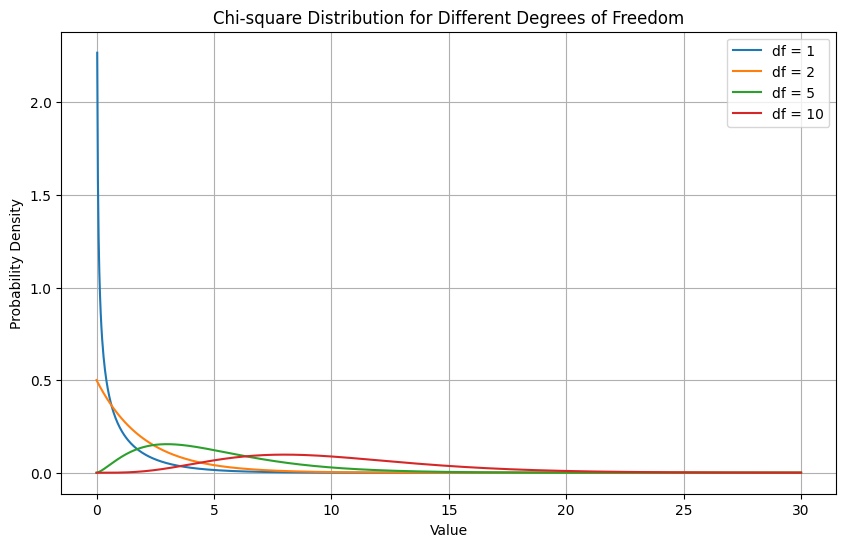

In [7]:
#  Create a Python script to simulate and visualize the Chi-square distribution and discuss its characteristics.

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2

def plot_chi_square(dfs, sample_size=10000):
    """
    Simulate and plot Chi-square distributions for given degrees of freedom.

    Parameters:
    - dfs: list of degrees of freedom (e.g., [1, 2, 5, 10])
    - sample_size: number of samples to simulate for each df
    """
    plt.figure(figsize=(10, 6))

    x = np.linspace(0, 30, 1000)

    for df in dfs:
        # Generate Chi-square samples
        samples = np.random.chisquare(df, sample_size)

        # Plot the PDF using scipy's chi2.pdf for smooth curve
        plt.plot(x, chi2.pdf(x, df), label=f'df = {df}')

        # Optional: overlay histogram of simulated samples (normalized)
        # plt.hist(samples, bins=50, density=True, alpha=0.3)

    plt.title('Chi-square Distribution for Different Degrees of Freedom')
    plt.xlabel('Value')
    plt.ylabel('Probability Density')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage:
degrees_of_freedom = [1, 2, 5, 10]
plot_chi_square(degrees_of_freedom)

In [8]:
# Write a Python program to perform an ANOVA test to compare means between multiple groups and interpret the results.

import numpy as np
import scipy.stats as stats

# Sample data: three groups with sample observations
group1 = [23, 20, 22, 21, 24]
group2 = [30, 29, 31, 28, 32]
group3 = [27, 26, 25, 28, 30]

# Perform one-way ANOVA
f_statistic, p_value = stats.f_oneway(group1, group2, group3)

print(f"F-statistic: {f_statistic:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: At least one group mean is significantly different.")
else:
    print("Fail to reject the null hypothesis: No significant difference among group means.")

F-statistic: 28.4138
P-value: 0.0000
Reject the null hypothesis: At least one group mean is significantly different.


In [11]:
# Write a Python function to check the assumptions (normality, independence, and equal variance) for ANOVA.


import numpy as np
import scipy.stats as stats
from statsmodels.stats.diagnostic import lilliefors
import warnings

def check_anova_assumptions(*groups, alpha=0.05):
    """
    Check ANOVA assumptions: normality, equal variances, independence.

    Parameters:
    - groups: multiple arrays/lists of sample data (each group)
    - alpha: significance level for tests (default 0.05)

    Prints:
    - Normality test results for each group (Lilliefors test)
    - Homogeneity of variances (Levene's test)
    - Note on independence assumption

    Note: Independence is usually ensured by study design and cannot be
          tested statistically with sample data.
    """
    print("Checking Normality (Lilliefors test) for each group:")
    for i, group in enumerate(groups, 1):
        group = np.array(group)
        if len(group) < 4:
            print(f"  Group {i}: Sample size too small for normality test.")
            continue
        stat, p = lilliefors(group)
        normal = p > alpha
        print(f"  Group {i}: p-value = {p:.4f} -> {'Normal' if normal else 'Not normal'}")

    print("\nChecking Homogeneity of Variances (Levene's test):")
    stat, p = stats.levene(*groups)
    equal_var = p > alpha
    print(f"  Levene's test p-value = {p:.4f} -> {'Equal variances' if equal_var else 'Unequal variances'}")

    print("\nIndependence Assumption:")
    print("  Note: Independence should be ensured by study design (random sampling, etc.) and cannot be tested statistically here.")

group1 = [23, 20, 22, 21, 24]
group2 = [30, 29, 31, 28, 32]
group3 = [27, 26, 25, 28, 30]

check_anova_assumptions(group1, group2, group3)

Checking Normality (Lilliefors test) for each group:
  Group 1: p-value = 0.9891 -> Normal
  Group 2: p-value = 0.9891 -> Normal
  Group 3: p-value = 0.9812 -> Normal

Checking Homogeneity of Variances (Levene's test):
  Levene's test p-value = 0.9290 -> Equal variances

Independence Assumption:
  Note: Independence should be ensured by study design (random sampling, etc.) and cannot be tested statistically here.


                           sum_sq    df           F        PR(>F)
C(FactorA)             541.500000   1.0  209.612903  4.615932e-12
C(FactorB)              32.666667   1.0   12.645161  1.980633e-03
C(FactorA):C(FactorB)    0.666667   1.0    0.258065  6.170101e-01
Residual                51.666667  20.0         NaN           NaN


<ipython-input-12-ae49b3e2aac6>:30: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1}` instead.

  sns.pointplot(x='FactorA', y='Value', hue='FactorB', data=df,


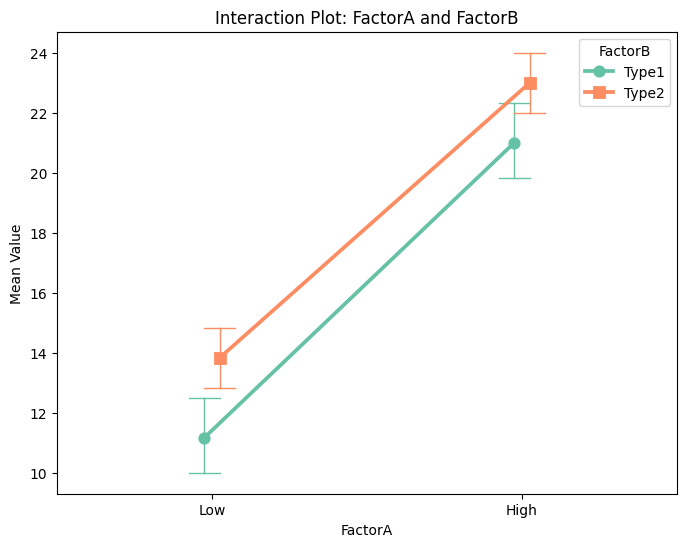

In [12]:
# Perform a two-way ANOVA test using Python to study the interaction between two factors and visualize the results.

import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns

# Example data: Measurements for two factors, Factor A and Factor B
# Each combination has several observations
data = {
    'FactorA': ['Low', 'Low', 'Low', 'Low', 'High', 'High', 'High', 'High'] * 3,
    'FactorB': ['Type1', 'Type1', 'Type2', 'Type2', 'Type1', 'Type1', 'Type2', 'Type2'] * 3,
    'Value': [10, 12, 13, 15, 20, 22, 21, 23, 11, 14, 12, 16, 19, 24, 22, 25, 9, 11, 13, 14, 21, 20, 23, 24]
}

df = pd.DataFrame(data)

# Fit the two-way ANOVA model with interaction
model = ols('Value ~ C(FactorA) * C(FactorB)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

# Interpretation:
# - Look at p-values for FactorA, FactorB, and their interaction (FactorA:FactorB)
# - Significant interaction means effect of one factor depends on level of the other

# Visualize interaction using interaction plot
plt.figure(figsize=(8,6))
sns.pointplot(x='FactorA', y='Value', hue='FactorB', data=df,
              dodge=True, markers=['o', 's'], capsize=0.1, errwidth=1, palette='Set2')
plt.title('Interaction Plot: FactorA and FactorB')
plt.ylabel('Mean Value')
plt.show()

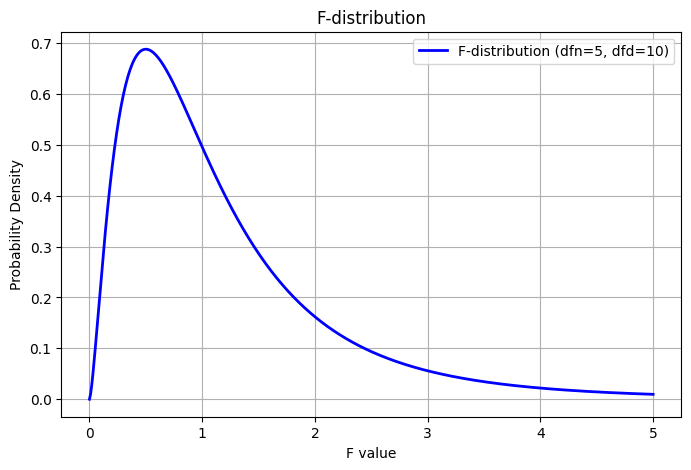

In [13]:
#  Write a Python program to visualize the F-distribution and discuss its use in hypothesis testing.

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import f

def plot_f_distribution(dfn, dfd):
    """
    Plot the F-distribution for given numerator and denominator degrees of freedom.

    Parameters:
    - dfn: degrees of freedom numerator
    - dfd: degrees of freedom denominator
    """
    x = np.linspace(0, 5, 500)
    y = f.pdf(x, dfn, dfd)

    plt.figure(figsize=(8, 5))
    plt.plot(x, y, 'b-', lw=2, label=f'F-distribution (dfn={dfn}, dfd={dfd})')
    plt.title('F-distribution')
    plt.xlabel('F value')
    plt.ylabel('Probability Density')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage:
numerator_df = 5   # degrees of freedom numerator
denominator_df = 10  # degrees of freedom denominator

plot_f_distribution(numerator_df, denominator_df)

In [14]:
#  Write a Python script to perform a Z-test for comparing proportions between two datasets or groups.

import numpy as np
import statsmodels.api as sm

def two_proportion_z_test(success_a, size_a, success_b, size_b, alpha=0.05):
    """
    Perform a two-proportion Z-test to compare proportions from two groups.

    Parameters:
    - success_a: Number of successes in group A
    - size_a: Total observations in group A
    - success_b: Number of successes in group B
    - size_b: Total observations in group B
    - alpha: Significance level (default 0.05)

    Returns:
    - z_stat: Z-test statistic
    - p_value: Two-tailed p-value
    - conclusion: Interpretation of the test result
    """
    count = np.array([success_a, success_b])
    nobs = np.array([size_a, size_b])

    z_stat, p_value = sm.stats.proportions_ztest(count, nobs, alternative='two-sided')

    print(f"Z-statistic: {z_stat:.4f}")
    print(f"P-value: {p_value:.4f}")

    if p_value < alpha:
        conclusion = "Reject null hypothesis: proportions are significantly different."
    else:
        conclusion = "Fail to reject null hypothesis: no significant difference in proportions."

    return z_stat, p_value, conclusion

# Example usage:
# Group A: 45 successes out of 100 trials
# Group B: 30 successes out of 80 trials

z_stat, p_value, conclusion = two_proportion_z_test(45, 100, 30, 80)
print(conclusion)

Z-statistic: 1.0142
P-value: 0.3105
Fail to reject null hypothesis: no significant difference in proportions.


In [15]:
#  Perform a Chi-square test for goodness of fit with simulated data and analyze the results.

import numpy as np
from scipy.stats import chisquare

# Simulated observed data: counts in 4 categories
observed = np.array([50, 30, 15, 5])

# Expected proportions for the categories (must sum to 1)
expected_proportions = np.array([0.4, 0.3, 0.2, 0.1])

# Calculate expected counts based on total observations
total_count = observed.sum()
expected = expected_proportions * total_count

# Perform Chi-square goodness of fit test
chi2_stat, p_value = chisquare(f_obs=observed, f_exp=expected)

print(f"Chi-square Statistic: {chi2_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: Observed distribution significantly differs from expected.")
else:
    print("Fail to reject the null hypothesis: No significant difference from expected distribution.")

Chi-square Statistic: 6.2500
P-value: 0.1001
Fail to reject the null hypothesis: No significant difference from expected distribution.
